In [7]:
# Preparamos todo para correr
from matplotlib import pylab as plt

# *Aleatoreidad y probabilidad*
La aleatoredidad es un concepto central de la teoría de probabilidad. En general, la aleatoredidad viene asociada con la incetidumbre, que puede surgir por los errores de los datos o por los tamaños finitos de las muestras.

En la computadora, la aleatoreidad se simula usando como base un [generador de números pseudo aleatorios](https://en.wikipedia.org/wiki/Pseudorandom_number_generator) (GNPA). Un GNPA genera una serie de números cuyas propiedades son similares a las de una serie de números aleatorios.

En <tt>python</tt> muchas de las funciones relacionadas están implementadas en el módulo <tt>random</tt>, pero una implementación más práctica aparece en el paquete <tt>numpy</tt>

In [22]:
# Importamos el paquete de numpy
from numpy import random
# Generamos un número al azar en el intervalo [0.0, 1.0)
x = random.rand()
print(x)

0.6834629351721363


Fíjense que si corren la celda de arriba muchas veces, el resultado obtenido es diferente, pero siempre un número entre 0 y 1. Pero en realidad, los GNPA utilizan algoritmos, cuyas propiedades estás perfectamente definidas por el valor inicial (la semilla, o <em>seed</em>). Por lo tanto, no son realmente aleatorios. En los viejos tiempos, en <tt>python</tt>, el <em>seed</em> podía definirse simplemente con la función homónima.

In [23]:
random.seed(1234)
print(random.rand())
random.seed(1234)
print(random.rand())

0.1915194503788923
0.1915194503788923


Una característica práctica de la implementación en <tt>numpy</tt> es que se puede generar <tt>arrays</tt> de números aleatorios, pasándole el tamaño en cada dimensión

In [24]:
random.seed(1234)
print('Un array de 5x1')
print(random.rand(5,))
print('Un array de 3x2')
print(random.rand(3,2))

Un array de 5x1
[0.19151945 0.62210877 0.43772774 0.78535858 0.77997581]
Un array de 3x2
[[0.27259261 0.27646426]
 [0.80187218 0.95813935]
 [0.87593263 0.35781727]]


Y por supuesto, si vuelvo a la misma semilla, los resultado son idénticos.

In [25]:
random.seed(1234)
print('Un array de 5x1')
print(random.rand(5,))
print('Un array de 3x2')
print(random.rand(3,2))

Un array de 5x1
[0.19151945 0.62210877 0.43772774 0.78535858 0.77997581]
Un array de 3x2
[[0.27259261 0.27646426]
 [0.80187218 0.95813935]
 [0.87593263 0.35781727]]


Como se puede ver arriba, para una semilla dada, la serie de números generada es idéntica (CAVEATS?). En la actualidad, fijar el <em>seed</em> de la manera que aparece arriba se considera mala práctica, y la sugerencia es hace lo siguiente:

In [26]:
from numpy.random import RandomState, SeedSequence
rs = RandomState(random.MT19937(SeedSequence(1234)))
print(rs.rand(5,))
# Later, you want to restart the stream
rs = RandomState(random.MT19937(SeedSequence(1234)))
print(rs.rand(5,))

[0.12038356 0.40370142 0.87770263 0.9565788  0.42646002]
[0.12038356 0.40370142 0.87770263 0.9565788  0.42646002]


Ahora vamos a intentar visualizar una muestra de una distribución uniforme. Generamos una muestra de 1000 elementos de vectores en dos dimenciones, en la región -1 < x < 1; -1 < y < 1

(1000, 2)


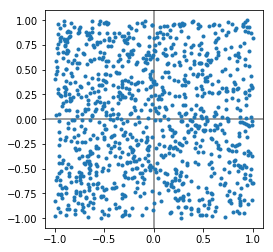

In [17]:
# Genaramos la muestra
sample = random.rand(1000, 2)

# Como queremos que la muestra esté entre -1 y 1 en ambas dimensiones, tenemos que multiplicar por 2 y restar 1.
sample = sample * 2 - 1

# Imprimimos la forma de la muestra
print(sample.shape)
plt.plot(sample[:, 0], sample[:, 1], '.')

# Para que sea más bonito, ponemos los ejes del mismo tamaño y le agregamos lineas verticales y horizontales
ax = plt.gca()
ax.set_aspect('equal')
ax.axvline(0, color='0.5', zorder=-1)
ax.axhline(0, color='0.5', zorder=-1)
